# NSL-KDD
## What is this?
- The NSL-KDD is an improvement of the KDD'99 dataset.
- Systems that detect malicious traffic inputs are called Intrusion Detection Systems (IDS) they are trained on internet traffic record data.
- The NSL-KDD is the benchmark for modern-day internet traffic.representative of existing real networks.

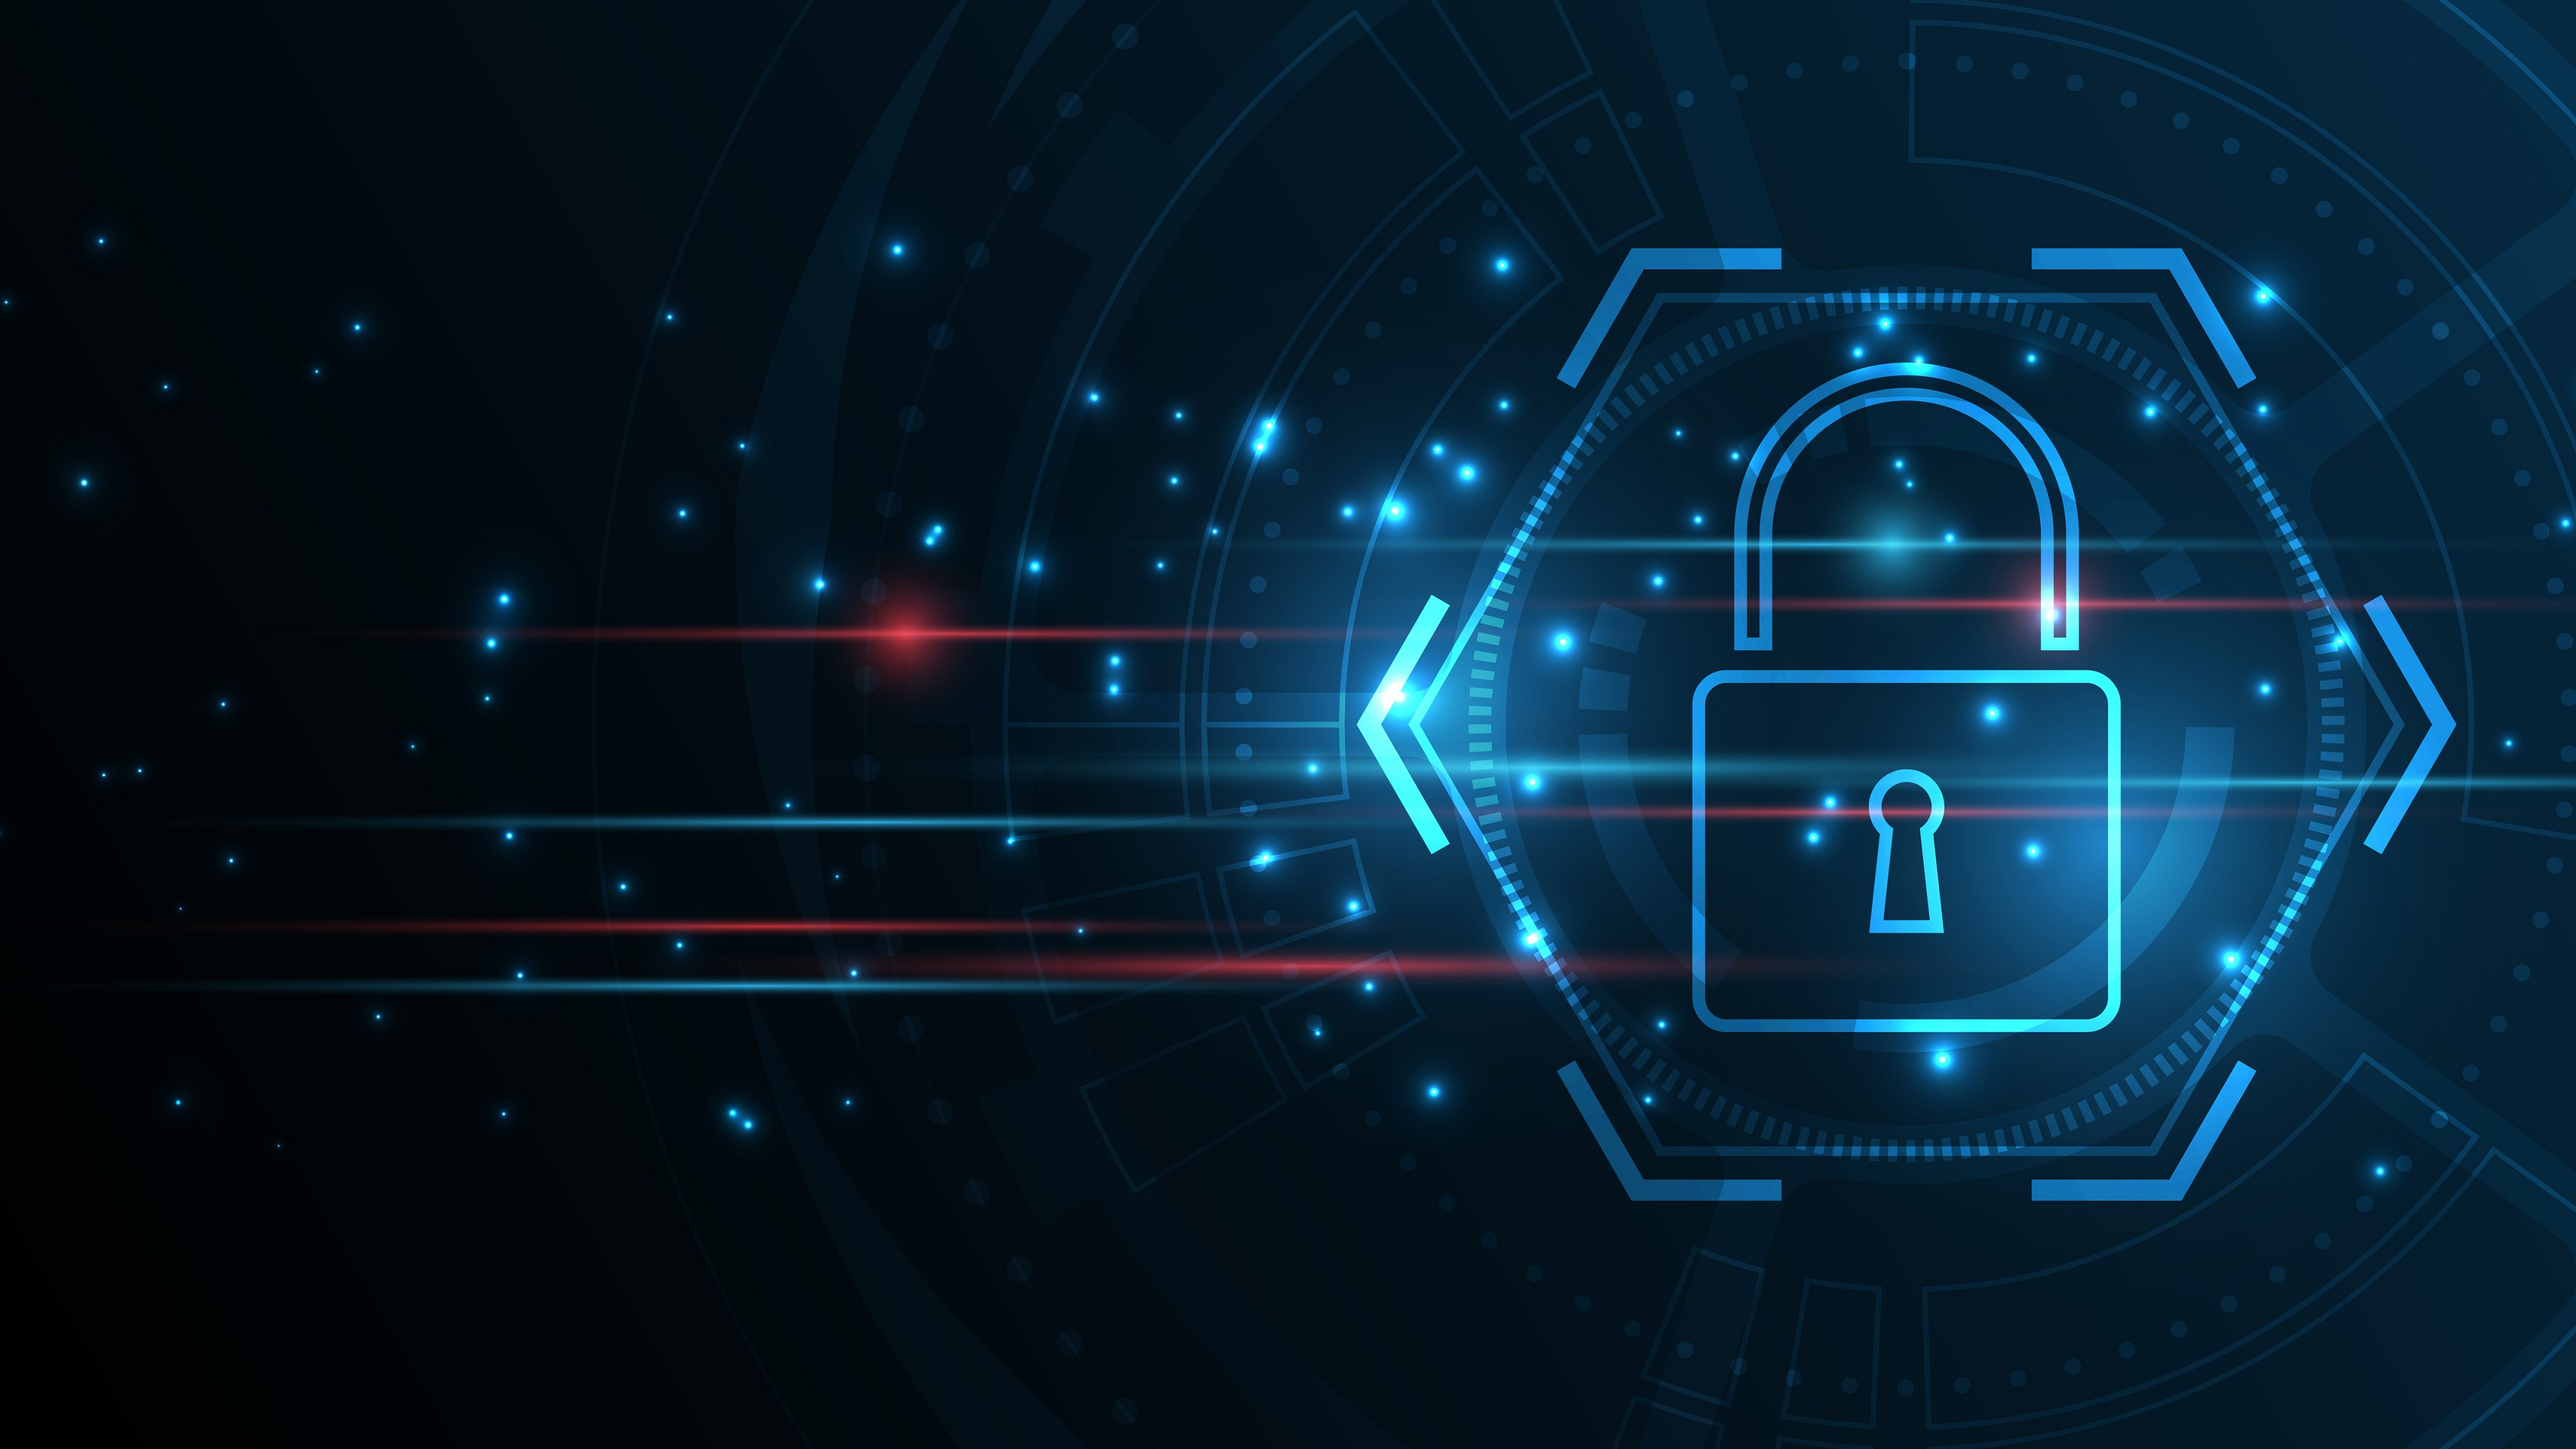

# Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from scipy.io import arff
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('../input/nslkdd/KDDTrain+.txt')


## Take a quick look at the data:

In [ ]:
data.head()

### We can see that the Columns are missing:

In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

data.columns = columns
# sanity check
data

In [ ]:
data = data.drop('level', axis=1)

#### because the original data has no "level"


In [ ]:
data.shape

In [ ]:
data.info()

### Data types: float64 (15 columns), int(23), object (4 columns)


In [ ]:
data.columns

# What does these columns mean?
## Features of network:
- 1. duration: time duration of the connection (quant.)
- 2. protocol type: protocol used in connection (cat., 3 categories)
- 3. service: destination network service used (cat., 70 categories)
- 4. flag: status of the connection (e.g. REJ = connection rejected) (cat., 11 categories)
- 5. src bytes: number of data bytes transferred from source to destination (quant.)
- 6. dst bytes: number of data bytes transferred from destination to source (quant.)
- 7. land: indicator whether port number and IP address of source and destination
are equal, if yes = 1, otherwise 0 (binary)
- 8. wrong fragment: number of wrong fragments in connection (quant.)
- 9. urgent: number of urgent packets (quant.)

## connection related features:
- 10. hot: number of ”hot” indicators in the content such as: entering a system directory, creating programs and executing programs (quant.)
- 11. num failed logins: number of failed login attempts (quant.)
- 12. logged in: 1 if successfully logged in, 0 otherwise (binary)
- 13. num compromised: number of ”compromised” conditions (quant.)
- 14. root shell: 1 if root shell is obtained, 0 otherwise (binary)
- 15. su attempted: 1 if ”su root” command attempted or used, 0 otherwise (quant.,
data set contains value 2)
- 16. num root: number of operations performed as a root or root accesses (quant.)
- 17. num file creations: number of file creation operations (quant.)
- 18. num shells: number of shell prompts (quant.)
- 19. num access files: number of operations on access control files (quant.)
- 20. num outbound cmds: number of outbound commands in an ftp session (quant.)
- 21. is host login: 1 if the login is from root or admin, 0 otherwise (binary)
- 22. is guest login: 1 if the login is from guest, 0 otherwise (binary)

## time related traffic features:
- 23. count: number of connections to the same destination host as the current connection in the past 2 seconds (quant.)
- 24. srv count: number of connections to the same service (port number) as the
current connection in the past 2 seconds (quant.)
- 25. serror rate: % of connections that have activated s0, s1, s2 or s3 flag (4) among
connections aggregated in count (quant.)
52
- 26. srv serror rate: % of connections that have activated s0, s1, s2 or s3 flag (4)
among connections aggregated in srv count (quant.)
- 27. rerror rate: % of connections that have activated REJ flag (4) among connections aggregated in count (quant.)
- 28. srv rerror rate: % of connections that have activated REJ flag (4) among connections aggregated in srv count (quant.)
-29. same srv rate: % of connections to the same service among those aggregated
in count (quant.)
- 30. diff srv rate: % of connections to the different service among those aggregated
in count (quant.)
- 31. srv diff host rate: % of connections that were to different destination machines
among the connections aggregated in srv count (quant.)

## host based traffic features:
- 32. dst host count: count of the connections having the same destination IP address (quant.)
- 33. dst host srv count: count of connections having the same port number (quant.)
- 34. dst host same srv rate: % of connections that were to different services, among
those in dst host count (quant.)
- 35. dst host diff srv rate: % of connections that were to different services, among
those in dst host count (quant.)
- 36 dst host same src port rate: % of connections that were to the same source
port, among those in dst host srv count (quant.)
54
- 37. dst host srv diff host rate: % of connections that were to different destination
machines, among those in dst host srv count (quant.)
- 38. dst host serror rate: % of connections that have activated the s0, s1, s2 or s3
flag (4), among those in dst host count (quant.)
- 39. dst host srv serror rate: % of connections that have activated the s0, s1, s2 or
s3 flag (4), among those in dst host srv count (quant.)
- 40. dst host rerror rate: % of connections that have activated the REJ flag (4),
among those in dst host count (quant.)
- 41. dst host srv rerror rate: % of connections that have activated the REJ flag (4),
among those in dst host srv count (quant.)

In [ ]:
data.describe()

## Visualizing Data


In [ ]:
data.hist(bins=25,figsize=(20,10));

## Is there a relationship between protocol type and occurance of attack?

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='attack',data=data,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('attack',fontdict={'fontsize':20})
plt.show()

### We can see that attacks occur more for tcp protocol, then udp, then icmp.

## What is the most service used?

In [ ]:
plt.figure(figsize=(20,5))
t = sns.countplot(x='service', data = data)
t.set_xticklabels(t.get_xticklabels(),rotation=90);

### http is the most website service used

In [ ]:
sns.set_theme(style="whitegrid")

sns.displot(
    data=data,
    x="duration", hue="flag",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
);

In [ ]:
data['attack'].unique()

In [ ]:
plt.figure(figsize = (10,10))
r = data.attack.value_counts().plot(kind='pie',shadow=True, explode=(0.1, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0), startangle=90,autopct='%1.1f%%')
r.set_xticklabels(r.get_xticklabels(),rotation=90);
plt.title('Attack variations')
plt.show()

## As we can see the attack label isn't balanced, to balance it we group all the small malicious attacks in one category:

In [ ]:
data["attack"] = np.where(data["attack"] != "normal", 'malicious','normal')


In [ ]:
plt.figure(figsize = (10,10))
r = data.attack.value_counts().plot(kind='pie',shadow=True, explode=(0.1, 0), startangle=90,autopct='%1.1f%%')
r.set_xticklabels(r.get_xticklabels(),rotation=90);
plt.title('Attack variations')
plt.show()

In [ ]:
data.info()

## Understanding our data:
### We use correlation matrix 

In [ ]:
corr_matrix=data.corr()
corr_matrix

### But Plotting a correlation plot is actually clearer 

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

### To understand the correlation plot: it creates a relation between 2 variables and checks if it's proportional(higher than 0.5) or inversely proportional (less than -0.5) , or no relation (close to zero)
#### Understanding the correlation between columns helps you make a better model as the insertion of lesser important columns will actually cause bias or corrupt the model.
### We found this:
- connection related features are highly correlated (rates).
- host based traffic features are also highly correlated (dsts). 



# Cleaning data:

### Duration is a critical column as its indications are somehow important but it holds many zeros and the concept of duration to be zero isn't actually acceptable, and these outliers causes the model to be very slow.
### To solve this we have three ways:
- We either delete all the zero rows in duration column, and that will actually make you lose a ton of data.
- or we actually replace the 0 with either median or a number close to zero, so we don't actually lose the data.

In [ ]:
# data = data[data.duration != 0]     ## First way: NO!

In [ ]:
print(data['duration'].quantile(0.50)) 
print(data['duration'].quantile(0.97)) 

## We searched for quantile ranges and we will replace later.

In [ ]:
data

## Missing data:
### Is there missing data?

In [ ]:
print(data.isnull().values.any())

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap( data.isnull())

In [ ]:
data.info()

## Encoding categorical columns:

In [ ]:
le = LabelEncoder()
data['protocol_type']=le.fit_transform(data['protocol_type'])
data['service']=le.fit_transform(data['service'])
data['flag']=le.fit_transform(data['flag'])
data['attack']=le.fit_transform(data['attack'])

In [ ]:
data.info()

### Now All data are numerical.

In [ ]:
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(data.corr()[['attack']].sort_values('attack').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

# Outliers:
## We are going to use two methods to deal with oultiers:
## 1) Deletion by boxplot identification.
## 2) Standardization.

### ______________________________________________

### To look for ouliers we use boxplot 

In [ ]:
nums = data.select_dtypes(exclude=["object"])
nums.plot(subplots = True , kind ='box', layout = (15,4), figsize = (25,35), patch_artist= True ,color = "#6F266E")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()

## Let's take a closer look to some of the outliers:

In [ ]:
fig = px.box(data, y='duration')
fig.show()

In [ ]:
fig = px.box(data, y='src_bytes')
fig.show()

In [ ]:
fig = px.box(data, y='srv_count')
fig.show()

In [ ]:
fig = px.box(data, y='dst_bytes')
fig.show()

In [ ]:
data.describe()

## 1) Deletion of outliers:

In [ ]:
data = data.drop(data[data['dst_bytes']>1500].index)
data = data.drop(data[data['src_bytes']>750].index)
print(data['duration'].quantile(0.10)) 
print(data['duration'].quantile(0.97)) 
data['duration'] = np.where(data['duration'] > 31, 0, data['duration'])   

#### We replaced outliers in duration with median to avoid losing alot of data

####  We only deleted the outliers that could actually corrupt data:

### Check the presence of outliers again:

In [ ]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=90);

#### Outliers are nowhere to be found

## VIF:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) 
for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

## Treatment of multicolinearity:

In [ ]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [ ]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

### calculating VIF for remaining columns

In [ ]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

### Rearragning columns:
- No need as Attack is the last column

In [ ]:
data

## Splitting data

### To create the proper comparison we drop attack column from x and make it y


In [ ]:
x = data.drop(['attack'] , axis = 1).values
y = data['attack'].values


In [ ]:
y.sum()

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)


In [ ]:
x_train.shape

In [ ]:
y_train.shape

# Scaling
### Make sure all data aren't categorical

In [ ]:
data.info()

In [ ]:
from sklearn.preprocessing import RobustScaler

#### Robust scaler reduces the effect of ouliers


In [ ]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [ ]:
x_train

In [ ]:
x_train.shape

In [ ]:
y_train.shape

## Logistic regression:

In [ ]:

# Function to calculate mean absolute error
def cross_val(x_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(x_test)
    model_cross = cross_val(x_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [ ]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

In [ ]:
def run_experiment(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
model = LogisticRegression()
run_experiment(model)

## Classification:
### 1) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

In [ ]:
y_pred = knn.predict(x_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

### 2) Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

In [ ]:
y_pred = naive.predict(x_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

### 3) Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

In [ ]:
y_pred = random.predict(x_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.metrics import classification_report
predict=model.predict(x_test)
report=classification_report(y_test,predict)
print(report)

### 4) Decision Tree Clssification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predict=model.predict(x_test)
from sklearn.metrics import classification_report
report=classification_report(y_test,predict)
print(report)

In [ ]:
y_pred = DT.predict(x_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

### As we can see from the classification above, Random foresr is the best classification.

# SVM classification
- by default parameters.

## 1) Linear kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

In [ ]:
y_pred = svclassifier.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

### Confusion matrix:

In [ ]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(model,x_test,y_test)
plt.show(pl)

## 2. Polynomial Kernel
### We will choose a degree of 6 as it's a more flexible than the 1 degree = linear, this will give a better tuning. 


In [ ]:
svclassifier = SVC(kernel='poly', degree=6)
svclassifier.fit(x_train, y_train)

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Confusion matrix:

In [ ]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(model,x_test,y_test)
plt.show(pl)

## 3. Gaussian Kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

In [ ]:
y_pred = svclassifier.predict(x_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Confusion matrix:

In [ ]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(model,x_test,y_test)
plt.show(pl)

## 4. Sigmoid Kernel


In [ ]:
y_pred = svclassifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Confusion matrix:

In [ ]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(model,x_test,y_test)
plt.show(pl)

## By variating parameters:

In [ ]:
C_grid = 0.02*np.arange(1,2)
gamma_grid = 0.02*np.arange(1,3)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1)             
gridCV.fit(x_train, y_train)
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']  

In [ ]:
print("SVM best C : " + str(best_C))
print("SVM best gamma : " + str(best_gamma))

In [ ]:
import sklearn.metrics as metrics
SVM_best = SVC(kernel='rbf')
SVM_best.fit(x_train, y_train);
Y_pred = SVM_best.predict(x_test)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

### Confusion matrix:

In [ ]:
from sklearn.metrics import plot_confusion_matrix
pl=plot_confusion_matrix(model,x_test,y_test)
plt.show(pl)

In [ ]:

cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []                                                   
FPR = []                                                   
cutoff_grid

In [ ]:
FPR, TPR, cutoffs = metrics.roc_curve(y_test,Y_pred,pos_label=1)      # positive label = 1.

## Visualize.

In [ ]:
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# Alternative way.
accuracy = metrics.accuracy_score(y_test,Y_pred)                    
# precision = metrics.precision_score(Y_test,Y_pred)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
# print('Precision   = {}'.format(np.round(precision,3)))

In [ ]:
# for multi-class
print("Precision Score : ",precision_score(y_test, Y_pred, pos_label='positive',average='micro'))


In [ ]:
# for multi-class
print("Recall Score : ",recall_score(y_test, Y_pred, 
                                           pos_label='positive',
                                           average='micro'))

## Visualize.

In [ ]:
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

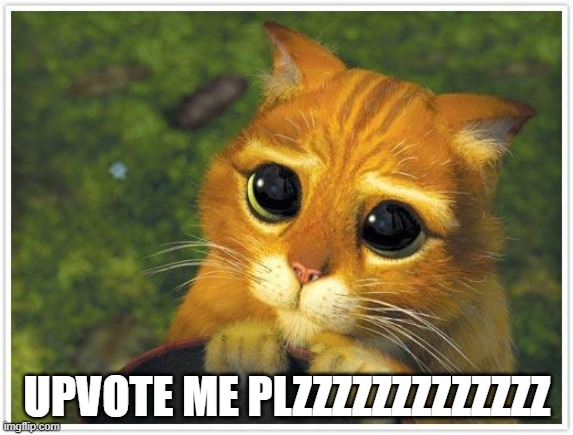